<h1>Сердечная недостаточность 🫀 - Лабороторная работа 2<h1>

<h7>Критерии оценки:<h7>

<ul>
  <li><input type="checkbox"> Произведено разбиение датасета на тренировочную/тестовую выборки - 2 балла </li>
  <li><input type="checkbox"> Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3 балла </li>
  <li><input type="checkbox" checked> Бейзлайновая модель из простого семейства (линейные модели, деревья решений, knn...) обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 6 баллов</li>
  <li><input type="checkbox" checked> Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2 балла</li>
  <li><input type="checkbox" checked> Обеспечена воспроизводимость решения: зафиксированы random_state, ноутбук воспроизводится от начала до конца без ошибок - 3 балла </li>
  <li><input type="checkbox" checked> Соблюден code style на уровне pep8 и On writing clean Jupyter notebooks - 4 балла</li>
  <li><input type="checkbox" checked> Принимаемые решения обоснованы и прокомментированы в markdown ячейках (то есть, например, если для кодирования категориальных переменных выбран метод Label Encoding, то текстом написано, почему он, и тп) - 10 баллов</li>
</ul>

<h3>Импорт библиотек<h3>

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import (
    f1_score, recall_score, precision_score, accuracy_score, roc_auc_score,
    confusion_matrix, precision_score, fbeta_score, precision_recall_curve, roc_curve
)

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

<h3>Просмотр данных<h3>

In [90]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>Деление на тестовую и обучающую выборку<h3>

In [91]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
        'exng', 'oldpeak', 'slp', 'caa', 'thall']]  # Признаки
y = df['output']                                    # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)
print("Обучающая выборка:")
print(X_train)

Обучающая выборка:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
45    52    1   1     120   325    0        1       172     0      0.2    2   
155   58    0   0     130   197    0        1       131     0      0.6    1   
180   55    1   0     132   353    0        1       132     1      1.2    1   
138   57    1   0     110   201    0        1       126     1      1.5    1   
179   57    1   0     150   276    0        0       112     1      0.6    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
137   62    1   1     128   208    1        0       140     0      0.0    2   
250   51    1   0     140   298    0        1       122     1      4.2    1   
161   55    0   1     132   342    0        1       166     0      1.2    2   
98    43    1   2     130   315    0        1       162     0      1.9    2   
133   41    1   1     110   235    0        1       153     0      0.0    2   

     caa  thall  
45     0      

In [92]:
print("Тестовая выборка:")
print(X_test)

Тестовая выборка:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
12    49    1   1     130   266    0        1       171     0      0.6    2   
268   54    1   0     122   286    0        0       116     1      3.2    1   
132   42    1   1     120   295    0        1       162     0      0.0    2   
28    65    0   2     140   417    1        0       157     0      0.8    2   
49    53    0   0     138   234    0        0       160     0      0.0    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
224   54    1   0     110   239    0        1       126     1      2.8    1   
187   54    1   0     124   266    0        0       109     1      2.2    1   
53    44    0   2     108   141    0        1       175     0      0.6    1   
69    62    0   0     124   209    0        1       163     0      0.0    2   
156   47    1   2     130   253    0        1       179     0      0.0    2   

     caa  thall  
12     0      2

<h3>Baseline<h3>

In [93]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

<h3>Логистическая регрессия<h3>

In [94]:
log_reg = LogisticRegression(max_iter=1000)  # Увеличение max_iter для сходимости
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<h3>Accuracy (Точность)<h3>

In [95]:
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.5921052631578947

In [96]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.8552631578947368

In [97]:
confusion_matrix(y_test, y_pred_log_reg)

array([[22,  9],
       [ 2, 43]])

In [98]:
confusion_matrix(y_test, y_pred_dummy)

array([[ 0, 31],
       [ 0, 45]])

In [99]:
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')

Precision for Logistic regression: 0.8269230769230769


In [100]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')

Precision for Dummy Classificator: 0.5921052631578947


In [101]:
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Recall for Logistic regression: 0.9555555555555556


In [102]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')

Recall for Dummy Classificator: 1.0


<h3>F1 - Score<h3>

In [104]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')

F1-score for Dummy Classificator: 0.743801652892562


In [105]:
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1-score for Logistic regression: 0.8865979381443299


In [106]:
print(f'F1-score for Dummy Classificator (recall bias): {fbeta_score(y_test, y_pred_dummy, beta=2)}')

F1-score for Dummy Classificator (recall bias): 0.87890625


In [107]:
print(f'F1-score for Logistic regression (recall bias): {fbeta_score(y_test, y_pred_log_reg, beta=2)}')

F1-score for Logistic regression (recall bias): 0.9267241379310345


In [108]:
print(f'Fbeta-score for Dummy Classificator (precision bias): {fbeta_score(y_test, y_pred_dummy, beta=0.5)}')

Fbeta-score for Dummy Classificator (precision bias): 0.6446991404011462


In [109]:
print(f'Fbeta-score for Logistic regression (precision bias): {fbeta_score(y_test, y_pred_log_reg, beta=0.5)}')

Fbeta-score for Logistic regression (precision bias): 0.849802371541502


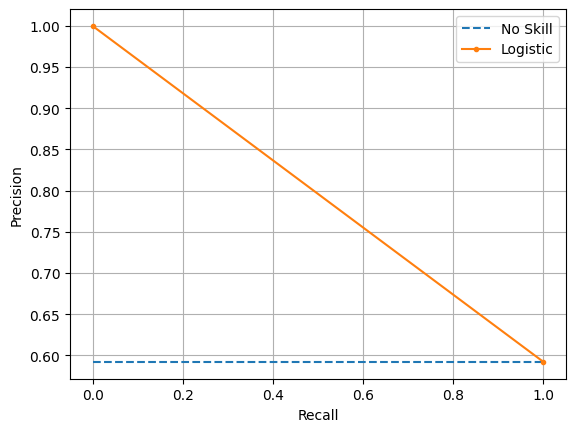

In [110]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dummy)

no_skill = len(y_test[y_test == 1]) / len(y_test)

plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

<h3> ROC-кривая <h3>

In [111]:
def plot_roc_auc(fpr, tpr, thresholds, title): #Функция для построения ROC-кривой
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()

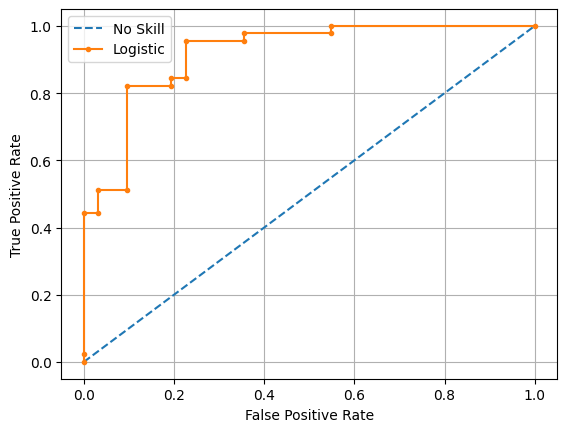

In [112]:
y_pred = log_reg.predict_proba(X_test)[:, 1]        # Вычисление ROC-кривой для логистической регрессии
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')

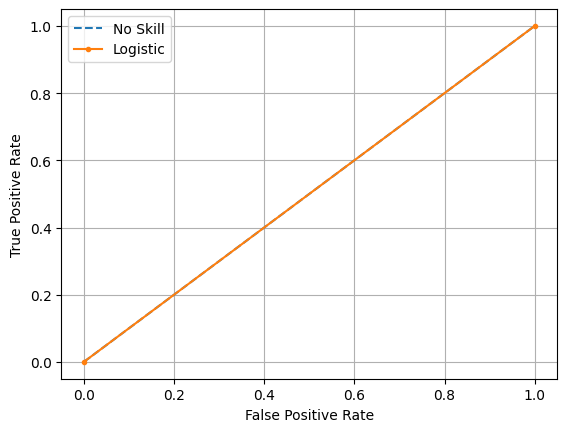

In [113]:
y_pred = dummy_clf.predict_proba(X_test)[:, 1]      # Вычисление ROC-кривой для Dummy-классификатора
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Dummy')